Total points for this HW: 100.
Due date: 02/20/2020 (at the start of class)

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

### Interpratibility could be important for many pricing models. For example in Real Estate, the home owner selling a house might not care what an algorithm predicts her home value to be, but they are interested in what it says the important factors are so that they know how they can raise the value of their home. In this case, interpretability is more vslusble than accuracy.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

### Self-Driving cars need near perfect levels of accuracy. They would be considered unsafe with anything below the highest level of accuracy. How the cars make the decisions they do is less imortant and we do not need to know this at every step so long as the car is accurate

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

### One idea, and excuse me because I cannot remember if I had read this in literature previously or not, would be to use the random forest as the model in order to get the most accurate predictions. From there, you use the predictions from the random forest itself and build a decision tree with the most accuracy in resembling the random forest predictions. You may lose some accuracy by doing this but you will gain interpratibility as the decision tree is much easier to interperate than the random forest.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [3]:
from io import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [5]:
# Find most common MPG value
df.MPG.value_counts()

bad     15
good     5
Name: MPG, dtype: int64

In [6]:
#Information Gain Function
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [83]:
#Discrete Splits - Cylinders (4,6,8), Weight(light, medium, heavy)
#Function to make 4 lists of indices for given value and question, good yes, good no, bad yes, bad no, 
#returns information gain for each split based on function defined above
def dectree(index, value, data, target):
    GY = []
    GN = []
    BY = []
    BN = []
    for i in range((len(data))):
        if index[i] == value:
            if target[i] == 'good':
                GY.append(i)
            else:
                BY.append(i)     
        else:
            if target[i] == 'good':
                GN.append(i)
            else:
                BN.append(i)
    return(InformationGain(len(GY),len(BY),len(GN),len(BN)))

In [84]:
dectree(df.cylinders, 4, df, df.MPG)

0.3652938975319328

In [85]:
dectree(df.cylinders, 6, df, df.MPG)

0.15307795338969116

In [86]:
dectree(df.cylinders, 8, df, df.MPG)

0.1225562489182657

In [87]:
dectree(df.weight, 'light', df, df.MPG)

0.09710717945150363

In [88]:
dectree(df.weight, 'medium', df, df.MPG)

0.0

In [89]:
dectree(df.weight, 'weighty', df, df.MPG)

0.15307795338969116

In [ ]:
#4 cylinders looks like the best question of the discrete splits based on info gain

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [7]:
df.sort_values(by = 'HP', ascending = True)

,MPG,cylinders,HP,weight
15,good,4,65,light
0,good,4,75,light
17,good,4,81,light
16,bad,6,85,medium
14,good,4,89,medium
1,bad,6,90,medium
11,good,4,92,medium
19,bad,4,93,light
5,bad,4,94,light
18,bad,6,95,medium


In [82]:
#Splits - 83, 87, 89.5, 91, 92.5 got from sorted list above, split at midpoint each time mgp changes from good to bad
hpsplit = [83, 87, 89.5, 91, 92.5]

for i in hpsplit:
    hpGY = []
    hpGN = []
    hpBY = []
    hpBN = []
    for j in range((len(df))):
        if df.HP[j] < i:
            if df.MPG[j] == 'good':
                hpGY.append(j)
            else:
                hpBY.append(j)
        else:
            if df.MPG[j] == 'good':
                hpGN.append(j)
            else:
                hpBN.append(j)
    print('\nGood Yes: {}\nGood No: {}\nBad Yes: {}\nBad No: {}'.format(hpGY, hpGN, hpBY, hpBN))
    print('Information Gain: {}'.format(InformationGain(len(hpGY), len(hpBY), len(hpGN), len(hpBN))))


Good Yes: [0, 15, 17]
Good No: [11, 14]
Bad Yes: []
Bad No: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 18, 19]
Information Gain: 0.36710265610273324

Good Yes: [0, 15, 17]
Good No: [11, 14]
Bad Yes: [16]
Bad No: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 18, 19]
Information Gain: 0.21417094500762923

Good Yes: [0, 14, 15, 17]
Good No: [11]
Bad Yes: [16]
Bad No: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 18, 19]
Information Gain: 0.3657765994712262

Good Yes: [0, 14, 15, 17]
Good No: [11]
Bad Yes: [1, 16]
Bad No: [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 18, 19]
Information Gain: 0.2759267455941731

Good Yes: [0, 11, 14, 15, 17]
Good No: []
Bad Yes: [1, 16]
Bad No: [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 18, 19]
Information Gain: 0.5091859254608121


HP split at 92.5 seems to be the most effective

d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

The split of HP at 92.5 gives us the most amount of information gain, it requires one more split for 2 cars who have HP less then 92.5 but still have bad MPG

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [81]:
hpGY = []
hpGN = []
hpBY = []
hpBN = []
for j in range((len(df))):
    if df.HP[j] < 92.5:
        if df.cylinders[j] != 6:
            if df.MPG[j] == 'good':
                hpGY.append(j)
            else:
                hpBY.append(j)
        else:
            if df.MPG[j] == 'good':
                hpBY.append(j)
            else:
                hpBN.append(j)
    else:
        if df.MPG[j] == 'good':
            hpGN.append(j)
        else:
            hpBN.append(j)
print('\nGood Yes: {}\nGood No: {}\nBad Yes: {}\nBad No: {}'.format(hpGY, hpGN, hpBY, hpBN))
print('Information Gain: {}'.format(InformationGain(len(hpGY), len(hpBY), len(hpGN), len(hpBN))))


Good Yes: [0, 11, 14, 15, 17]
Good No: []
Bad Yes: []
Bad No: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 18, 19]
Information Gain: 0.8112781244591328


In [79]:
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

[decision_tree.png](attachment:decision_tree.png).

In [90]:
from IPython.display import Image

![title](img![decision_tree.png](attachment:decision_tree.png)/decision_tree.png)

In [92]:
from IPython.display import IFrame
IFrame("decision_tree.pdf", width=600, height=300)

### Not sure if the picture comes up when this is not run locally, so I included a pdf version when submitting the homework

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,4,70,light == Good

?,6,113,medium == Bad

?,6,83,weighty == Bad

?,4,95,weighty == Bad


### Question 3, Predicting burden of disease （40 pts)

In [132]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [206]:
from sklearn.model_selection import train_test_split

y = data.loc[:, 'BurdenOfDisease']
X = data.loc[:, 'FrxnPeaceIn10': 'FemaleLtrcyRate']

#Dummies creates binary indices of string variables
X=pd.get_dummies(X)
y = pd.get_dummies(y)
# Split data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print(X_train.head())

    FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
7             1.0             0.00                 66            0.85149   
53            1.0             8.04             317000            0.82178   
15            1.0             4.19               9345            0.89109   
36            0.4             0.12              25183            0.28713   
12            1.0             2.87              45564            0.59406   

    SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
7             0.97030            0.99010            0.99010   
53            0.82178            0.59406            0.85149   
15            0.99010            0.24752            0.56436   
36            0.82178            0.22772            0.42574   
12            0.85149            0.69307            0.64356   

    TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
7                0.064                   0.475                    0.002   
53            

In [254]:
#Decision tree uses accuracy_score in order to measure performance of model
from sklearn.tree import DecisionTreeClassifier
score1=[]
for i in range(1,100, 4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
    dtT=DecisionTreeClassifier(max_depth = i)
    dtT.fit(X_train,y_train)
    score1.append(dtT.score(X_test, y_test))
print(score1)
print(np.mean(score1))

[0.3269230769230769, 0.4230769230769231, 0.36538461538461536, 0.5, 0.6730769230769231, 0.5769230769230769, 0.5192307692307693, 0.6538461538461539, 0.5192307692307693, 0.6346153846153846, 0.4807692307692308, 0.5961538461538461, 0.6346153846153846, 0.6730769230769231, 0.5384615384615384, 0.6538461538461539, 0.6538461538461539, 0.75, 0.46153846153846156, 0.6538461538461539, 0.6538461538461539, 0.5576923076923077, 0.6538461538461539, 0.5, 0.5576923076923077]
0.5684615384615385


In [252]:
#FOR OWN REFERENCE
##Esentially True Positive vs False Positive rate, closer to 1 is best, 0.5 is random chance
#from sklearn.metrics import roc_auc_score
#AUC_OS=[]
#for i in range(10):
 #   X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=i)
  #  dt=DecisionTreeClassifier()
   # dt.fit(X_train,y_train)
    # predict_proba predicts the probability of each class rather than just the most likely class
    #pred=dt.predict(X_test) # predicted probability of y = 1
    #AUC_OS.append(roc_auc_score(np.array(y_test),pred))
#print(AUC_OS)
#print("OS AUC",np.mean(AUC_OS))

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

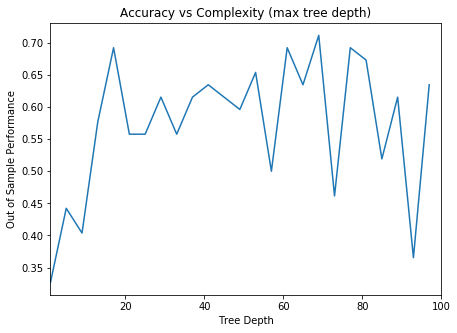

In [255]:
%matplotlib inline  
import matplotlib.pylab as plt

plt.figure(figsize=(7,5))
plt.plot(range(1,100,4),OS2)
plt.xlabel("Tree Depth")
plt.ylabel("Out of Sample Performance")
plt.title("Accuracy vs Complexity (max tree depth)")
plt.xlim(1,100)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# GridSearch optimizes parameter of choice to take out the guess work - takes out necessity of for loop above
param_grid = {'max_depth':range(1,100)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_train,y_train)
print(rs.best_params_)
pred=rs.predict(X_test)
print(accuracy_score(np.array(y_test), pred))

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 8}
0.6923076923076923


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [182]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 999)
dtT=DecisionTreeClassifier(max_depth = 3)
dtT.fit(X_train,y_train)

thestring=tree.export_graphviz(dtT,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dtT.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="AdultLtrcyRate <= 0.856, samples = 78, value = [15, 22, 21, 20], class = high", fillcolor="#fcfffc"] ;
1 [label="ExtResHlthPctTotExpHlth <= 0.005, samples = 43, value = [15, 21, 1, 6], class = high", fillcolor="#d8f9d5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 6, value = [0, 0, 0, 6], class = medium", fillcolor="#d739e5"] ;
1 -> 2 ;
3 [label="GDPPCptaIntDol <= 1094.0, samples = 37, value = [15, 21, 1, 0], class = high", fillcolor="#cdf8c9"] ;
1 -> 3 ;
4 [label="samples = 8, value = [8, 0, 0, 0], class = awful", fillcolor="#e58139"] ;
3 -> 4 ;
5 [label="samples = 29, value = [7, 21, 1, 0], class = high", fillcolor="#8aee81"] ;
3 -> 5 ;
6 [label="SustAccImprSanRur <= 0.866, samples = 35, value = [0, 1, 20, 14], class = low", fillcolor="#c6e3f8"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [l

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
#rf.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1)
param_grid = {'max_depth':range(1,1000)}
gr=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
rs=gr.fit(X_train,y_train)
pred=rs.predict(X_test)
print(accuracy_score(np.array(y_test),pred))

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6346153846153846


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

### My decision tree actually performed better in terms of accuracy than the random forrest classifier. This may be because I only explored one metric used to measure accuracy, and if I measured more it may have been more accurate to use the random forest. In either situation, we sacrifice interpretability in using the random forest. This can be important depending on why you want to predict the burden of disease. If you only want to know countries that are prone to disease and where a disease may occur in the future, then accuracy is the priority. However if you want to know the causes of the disease so that it may be prevented, the decision tree is optimal so you can see the primary factors in determining the Burden of Disease.